This is the model construction part of my capstone project 2.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Start by reading in the data and remembering the first few observations

# On laptop:
#df = pd.read_csv('C:/Users/mdkhi/Documents/Capstone Project 2/data/Complete Data.csv', index_col=0, na_values=['-'])

# On desktop:
df = pd.read_csv('C:/Users/Hill HP 2015/Documents/Springboard/Capstone Project 2/data/Complete Data.csv', index_col=0, na_values=['-'])

df.head()

,Player,Team,Position,Date of Birth,Nationality,Height (in),Weight (lbs),Draft Year,Draft Round,GP,...,Rebounds Created,PIM,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs %,Season
0,Aaron Downey,DET,R,1974-08-27,CAN,73,215,NaN,NaN,56,...,1,116,21,4,3,79,48,6,NaN,2007-2008
1,Aaron Johnson,NYI,D,1983-04-30,CAN,73,204,2001.0,3.0,30,...,1,30,4,16,18,41,39,28,NaN,2007-2008
2,Aaron Miller,VAN,D,1971-08-11,USA,75,210,1989.0,5.0,57,...,5,32,4,29,15,37,74,80,NaN,2007-2008
3,Aaron Rome,CBJ,D,1983-09-27,CAN,73,220,2002.0,4.0,17,...,2,33,5,4,2,33,22,17,NaN,2007-2008
4,Aaron Voros,MIN,L,1981-07-02,CAN,74,210,2001.0,8.0,55,...,8,141,32,10,8,96,67,5,20.0,2007-2008


In [3]:
# I'll need to put in the player's age to add that to the regression model.  I'll calculate that using the player's birth year
# and the season beginning year.

age_list = np.empty(len(df))

for i in range(len(age_list)):
    age_list[i] = 0
    
for i in range(len(df)):
    age = (int(df[i:(i+1)]['Season'].str[0:4]) - int(df[i:(i+1)]['Date of Birth'].str[0:4]))
    age_list[i] = age
    
df['Age'] = age_list

In [4]:
# I'd like to use player nationality also, so I'll have to code a dummy value for each one.

# Split off the smaller countries to code as OTH
df_oth = df[(df['Nationality'] != 'CAN') & (df['Nationality'] != 'USA') & (df['Nationality'] != 'SWE') & (df['Nationality'] != 'CZE') & (df['Nationality'] != 'RUS')& (df['Nationality'] != 'FIN') & (df['Nationality'] != 'SVK')]
df_oth['Nationality'] = 'OTH'

df_temp = df[(df['Nationality'] == 'CAN') | (df['Nationality'] == 'USA') | (df['Nationality'] == 'SWE') | (df['Nationality'] == 'CZE') | (df['Nationality'] == 'RUS') | (df['Nationality'] == 'FIN') | (df['Nationality'] == 'SVK')]

df = pd.concat([df_temp,df_oth])

# Pandas get dummies function does the work for me
df = pd.get_dummies(df,columns=['Nationality'])

df.head()

C:\Users\Hill HP 2015\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Player,Team,Position,Date of Birth,Height (in),Weight (lbs),Draft Year,Draft Round,GP,TOI,...,Season,Age,Nationality_CAN,Nationality_CZE,Nationality_FIN,Nationality_OTH,Nationality_RUS,Nationality_SVK,Nationality_SWE,Nationality_USA
0,Aaron Downey,DET,R,1974-08-27,73,215,NaN,NaN,56,256.933333,...,2007-2008,33.0,1,0,0,0,0,0,0,0
1,Aaron Johnson,NYI,D,1983-04-30,73,204,2001.0,3.0,30,415.850000,...,2007-2008,24.0,1,0,0,0,0,0,0,0
2,Aaron Miller,VAN,D,1971-08-11,75,210,1989.0,5.0,57,988.183333,...,2007-2008,36.0,0,0,0,0,0,0,0,1
3,Aaron Rome,CBJ,D,1983-09-27,73,220,2002.0,4.0,17,309.033333,...,2007-2008,24.0,1,0,0,0,0,0,0,0
4,Aaron Voros,MIN,L,1981-07-02,74,210,2001.0,8.0,55,504.600000,...,2007-2008,26.0,1,0,0,0,0,0,0,0


In [5]:
# I was going to split off the most recent season for testing, but the results of the models were so bad, I decided
# not to and just use all the data for training.  I'll leave this section here in case something changes later.

# I'll set the target data as the 2017-18 season of the data and use the other seasons to train the model.

#target = df[df['Season'] == '2017-2018']
#df = df[df['Season'] != '2017-2018']

#target.head()

In [6]:
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
# I'll start by splitting to train and test for points.

X_train_pts, X_test_pts, y_train_pts, y_test_pts = train_test_split(df[['Height (in)','Weight (lbs)','Age','Nationality_CAN','Nationality_USA','Nationality_SWE','Nationality_CZE','Nationality_RUS','Nationality_FIN','Nationality_SVK','Nationality_OTH']], df['Total Points'])

In [51]:
# I've read that StatsModels is good for initial testing, but SKLearn is better for optimimzing, so I'll start there.
# First, I'll test the metrics one by one, then I'll test them together to see which performs better.

# Define the categories
total_points = df['Total Points']
test_var = df['Height (in)']

pts_model = sm.ols('total_points ~ test_var', df)
pts_results = pts_model.fit()

print(pts_results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_points   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     42.96
Date:                Wed, 01 Aug 2018   Prob (F-statistic):           5.87e-11
Time:                        13:33:24   Log-Likelihood:                -42955.
No. Observations:                9706   AIC:                         8.591e+04
Df Residuals:                    9704   BIC:                         8.593e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.2384      7.077      9.360      0.0

In [53]:
# OK, that R^2 score is useless. Next category.

# Redefine the test category
test_var = df['Weight (lbs)']

pts_model = sm.ols('total_points ~ test_var', df)
pts_results = pts_model.fit()

print(pts_results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     23.92
Date:                Wed, 01 Aug 2018   Prob (F-statistic):           1.02e-06
Time:                        13:35:07   Log-Likelihood:                -42965.
No. Observations:                9706   AIC:                         8.593e+04
Df Residuals:                    9704   BIC:                         8.595e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.0236      2.696     12.247      0.0

In [54]:
# Even more useless. Next.

# Redefine the test category
test_var = df['Age']

pts_model = sm.ols('total_points ~ test_var', df)
pts_results = pts_model.fit()

print(pts_results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_points   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     176.8
Date:                Wed, 01 Aug 2018   Prob (F-statistic):           5.37e-40
Time:                        13:36:31   Log-Likelihood:                -42889.
No. Observations:                9706   AIC:                         8.578e+04
Df Residuals:                    9704   BIC:                         8.580e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1991      1.196      3.510      0.0

In [55]:
# Well, that has the best R^2 score so far, but it's still useless.  Last individual category.

# Redefine the test category
test_var = df[['Nationality_CAN','Nationality_USA','Nationality_SWE','Nationality_CZE','Nationality_RUS','Nationality_FIN','Nationality_SVK','Nationality_OTH']]

pts_model = sm.ols('total_points ~ test_var', df)
pts_results = pts_model.fit()

print(pts_results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_points   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     24.23
Date:                Wed, 01 Aug 2018   Prob (F-statistic):           3.16e-37
Time:                        13:37:20   Log-Likelihood:                -42880.
No. Observations:                9706   AIC:                         8.578e+04
Df Residuals:                    9697   BIC:                         8.584e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.982e+12    9.4e+12     -0.743      

In [56]:
# OK, a tiny bit better still.  How about everything together?

# Combine the categories
test_vars = df[['Height (in)','Weight (lbs)','Age','Nationality_CAN','Nationality_USA','Nationality_SWE','Nationality_CZE','Nationality_RUS','Nationality_FIN','Nationality_SVK','Nationality_OTH']]

pts_model = sm.ols('total_points ~ test_vars', df)
pts_results = pts_model.fit()

print(pts_results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_points   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     43.70
Date:                Wed, 01 Aug 2018   Prob (F-statistic):           1.24e-85
Time:                        13:38:16   Log-Likelihood:                -42763.
No. Observations:                9706   AIC:                         8.555e+04
Df Residuals:                    9695   BIC:                         8.563e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        45.5219      7.232      6.294

In [58]:
plt.rcParams['figure.figsize'] = (12,8)

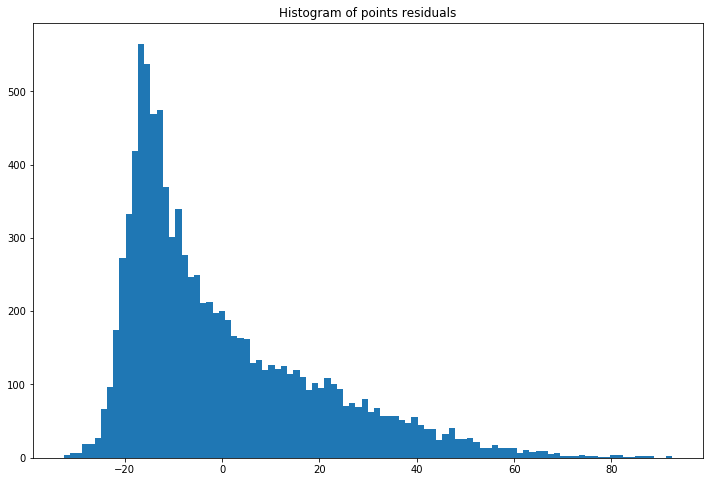

In [59]:
# Still a very low R^2 score. Let's see the histogram of the residuals.

plt.hist(pts_results.resid, bins=int(np.sqrt(len(df))))
plt.title('Histogram of points residuals')
plt.show()

In [14]:
# Let's see how SciKit-Learn compares.

pts_lr = LinearRegression()

pts_lr.fit(X_train_pts, y_train_pts)

lr_score_train = pts_lr.score(X_train_pts, y_train_pts)
print(lr_score_train)

0.04077629854419074


In [15]:
# Very similar score, as it should be.  I'll calculate the R^2 score on the test set to see if the model is overfitting.

lr_score_test = pts_lr.score(X_test_pts, y_test_pts)
print(lr_score_test)

0.04765603996556911


In [16]:
# Maybe a little overfitting.  What's the RMSE on the training set?

from sklearn.metrics import mean_squared_error

lr_pts_rmse_train = mean_squared_error(y_train_pts, pts_lr.predict(X_train_pts))
print(lr_pts_rmse_train)

386.1413001100163


In [17]:
# And the RMSE on the test set?

lr_pts_rmse_test = mean_squared_error(y_test_pts, pts_lr.predict(X_test_pts))
print(lr_pts_rmse_test)

414.148138606905


In [18]:
# Time to try some regularization.

from sklearn.linear_model import Ridge

# I'll loop over several values to find the best ridge model
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
solvers = ['svd', 'cholesky', 'sparse_cg', 'lsqr', 'sag']

for solver in solvers:
    for alpha in alphas:
        pts_ridge = Ridge(alpha=alpha, solver=solver)
        pts_ridge.fit(X_train_pts, y_train_pts)
        
        print('Score for {} alpha and {} solver is : {}'.format(alpha, solver, pts_ridge.score(X_train_pts, y_train_pts)))
    print('\n')

Score for 0.001 alpha and svd solver is : 0.04077629854413223
Score for 0.01 alpha and svd solver is : 0.04077629853833631
Score for 0.1 alpha and svd solver is : 0.040776297959077
Score for 1 alpha and svd solver is : 0.04077624036482408
Score for 10 alpha and svd solver is : 0.04077079190449473
Score for 100 alpha and svd solver is : 0.04041704840204363
Score for 1000 alpha and svd solver is : 0.03452818514643152


Score for 0.001 alpha and cholesky solver is : 0.04077629854413223
Score for 0.01 alpha and cholesky solver is : 0.0407762985383362
Score for 0.1 alpha and cholesky solver is : 0.040776297959077
Score for 1 alpha and cholesky solver is : 0.04077624036482408
Score for 10 alpha and cholesky solver is : 0.04077079190449473
Score for 100 alpha and cholesky solver is : 0.04041704840204363
Score for 1000 alpha and cholesky solver is : 0.03452818514643152


Score for 0.001 alpha and sparse_cg solver is : 0.040769392386162284
Score for 0.01 alpha and sparse_cg solver is : 0.040769

In [19]:
# Not any better.  RMSE on training?

pts_ridge = Ridge(alpha=0.001, solver='svd')
pts_ridge.fit(X_train_pts, y_train_pts)

ridge_score_train = pts_ridge.score(X_train_pts, y_train_pts)
ridge_score_test = pts_ridge.score(X_test_pts, y_test_pts)

ridge_pts_rmse_train = mean_squared_error(y_train_pts, pts_ridge.predict(X_train_pts))
print(ridge_pts_rmse_train)

386.1413001100398


In [20]:
# And test?

ridge_pts_rmse_test = mean_squared_error(y_test_pts, pts_ridge.predict(X_test_pts))
print(ridge_pts_rmse_test)

414.1481425680973


In [21]:
# Try Lasso.

from sklearn.linear_model import Lasso

alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
# And loop
for alpha in alphas:
    pts_lasso = Lasso(alpha=alpha)
    pts_lasso.fit(X_train_pts, y_train_pts)
        
    print('Score for {} alpha is : {}'.format(alpha, pts_lasso.score(X_train_pts, y_train_pts)))

Score for 1e-05 alpha is : 0.040776298488479856
Score for 0.0001 alpha is : 0.04077629338319233
Score for 0.001 alpha is : 0.04077580746813403
Score for 0.01 alpha is : 0.040727180466905266
Score for 0.1 alpha is : 0.03947431663693901
Score for 1 alpha is : 0.021376919453122922
Score for 10 alpha is : 0.0077177392397010935


C:\Users\Hill HP 2015\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [22]:
# Same results.  RMSE on training?

pts_lasso = Lasso(alpha=0.00001)
pts_lasso.fit(X_train_pts, y_train_pts)

lasso_score_train = pts_lasso.score(X_train_pts, y_train_pts)
lasso_score_test = pts_lasso.score(X_test_pts, y_test_pts)

lasso_pts_rmse_train = mean_squared_error(y_train_pts, pts_lasso.predict(X_train_pts))
print(lasso_pts_rmse_train)

386.141300132443


C:\Users\Hill HP 2015\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [23]:
# And test?

lasso_pts_rmse_test = mean_squared_error(y_test_pts, pts_lasso.predict(X_test_pts))
print(lasso_pts_rmse_test)

414.1481633095788


In [24]:
# The lack of improvement with either regularization suggests the model is not overfitting.
# Points prediction via linear regression looks like a bust.  How about puck possession, aka Corsi?

# Create a new train test split for CF%
X_train_cf, X_test_cf, y_train_cf, y_test_cf = train_test_split(df[['Height (in)','Weight (lbs)','Age','Nationality_CAN','Nationality_USA','Nationality_SWE','Nationality_CZE','Nationality_RUS','Nationality_FIN','Nationality_SVK','Nationality_OTH']], df['CF%'])

In [25]:
# I'm just going to test all the categories together and split them apart if there's any good reason to, for instance,
# if this model works well at all.

# Redefine the target value
target_var = df['CF%']

cf_model = sm.ols('target_var ~ test_vars', df)
cf_results = cf_model.fit()

print(cf_results.summary())

                            OLS Regression Results                            
Dep. Variable:             target_var   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     40.29
Date:                Wed, 01 Aug 2018   Prob (F-statistic):           1.12e-78
Time:                        13:13:38   Log-Likelihood:                -33835.
No. Observations:                9706   AIC:                         6.769e+04
Df Residuals:                    9695   BIC:                         6.777e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        71.2790      2.883     24.727

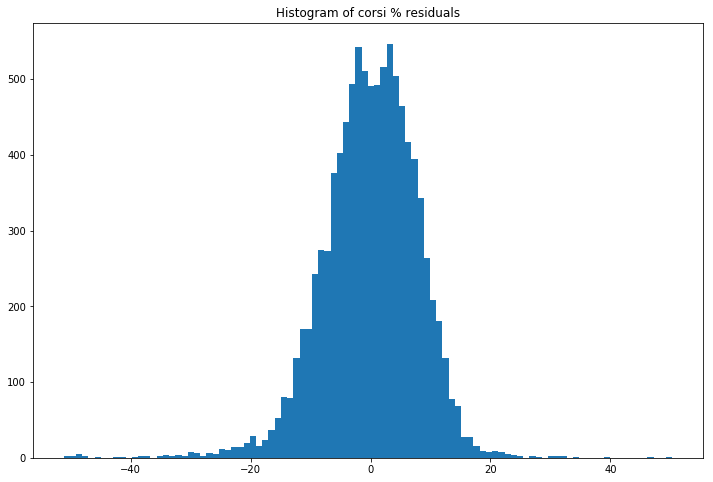

In [60]:
# This looks even worse. Residuals again.

plt.hist(cf_results.resid, bins=int(np.sqrt(len(df))))
plt.title('Histogram of corsi % residuals')
plt.show()

In [27]:
# I'll try SK-Learn again anyway.

cf_lr = LinearRegression()

cf_lr.fit(X_train_cf, y_train_cf)

print(cf_lr.score(X_train_cf, y_train_cf))

0.04082827266773348


In [28]:
# Again, similar to points. And again, the test set score to see about overfitting.

print(cf_lr.score(X_test_cf, y_test_cf))

0.035187959244626255


In [29]:
#  Again, it's hard to tell.  Ridge?

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for solver in solvers:
    for alpha in alphas:
        cf_ridge = Ridge(alpha=alpha, solver=solver)
        cf_ridge.fit(X_train_cf, y_train_cf)
        
        print('Score for {} alpha and {} solver is : {}'.format(alpha, solver, cf_ridge.score(X_train_cf, y_train_cf)))
    print('\n')

Score for 0.001 alpha and svd solver is : 0.04082827266759392
Score for 0.01 alpha and svd solver is : 0.040828272653790416
Score for 0.1 alpha and svd solver is : 0.04082827127501732
Score for 1 alpha and svd solver is : 0.040828134961373386
Score for 10 alpha and svd solver is : 0.040815897743957774
Score for 100 alpha and svd solver is : 0.04021796130748634
Score for 1000 alpha and svd solver is : 0.032591130918965816


Score for 0.001 alpha and cholesky solver is : 0.04082827266759392
Score for 0.01 alpha and cholesky solver is : 0.040828272653790416
Score for 0.1 alpha and cholesky solver is : 0.04082827127501732
Score for 1 alpha and cholesky solver is : 0.040828134961373386
Score for 10 alpha and cholesky solver is : 0.040815897743957774
Score for 100 alpha and cholesky solver is : 0.04021796130748634
Score for 1000 alpha and cholesky solver is : 0.032591130918965705


Score for 0.001 alpha and sparse_cg solver is : 0.040757363544024705
Score for 0.01 alpha and sparse_cg solver 

In [30]:
# No change.  Last, lasso.

alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]

for alpha in alphas:
    cf_lasso = Lasso(alpha=alpha)
    cf_lasso.fit(X_train_cf, y_train_cf)
        
    print('Score for {} alpha is : {}'.format(alpha, cf_lasso.score(X_train_cf, y_train_cf)))

Score for 1e-05 alpha is : 0.040828272333093385
Score for 0.0001 alpha is : 0.040828240727291076
Score for 0.001 alpha is : 0.040825077962263645
Score for 0.01 alpha is : 0.04050798238918274
Score for 0.1 alpha is : 0.034604714945627446
Score for 1 alpha is : 0.012787752182938594
Score for 10 alpha is : 0.004459024898683106


C:\Users\Hill HP 2015\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [31]:
# So again, the model doesn't appear to be overfitting.  So, Corsi is even harder to predict than points with linear 
# regression.  So, I'll try a different model instead, random forests, starting with points.

from sklearn.ensemble import RandomForestRegressor

estimators = [10, 25, 50, 75, 100, 250, 500, 750, 1000]
features = ['sqrt', 'log2', None]

for feature in features:
    for estimator in estimators:
        pts_rf = RandomForestRegressor(n_estimators=estimator, max_features=feature, oob_score=True)
        pts_rf.fit(X_train_pts, y_train_pts)
        
        print('OOB score for {} max features tree with {} estimators is: {}'.format(feature, estimator, pts_rf.oob_score_))
    print('\n')

C:\Users\Hill HP 2015\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


OOB score for sqrt max features tree with 10 estimators is: -0.11916166225080338
OOB score for sqrt max features tree with 25 estimators is: 0.04264298035762493
OOB score for sqrt max features tree with 50 estimators is: 0.060571908011281206
OOB score for sqrt max features tree with 75 estimators is: 0.07184432189704149
OOB score for sqrt max features tree with 100 estimators is: 0.07675887813888971
OOB score for sqrt max features tree with 250 estimators is: 0.09126754830955852
OOB score for sqrt max features tree with 500 estimators is: 0.08802262436253716
OOB score for sqrt max features tree with 750 estimators is: 0.08958932372700634
OOB score for sqrt max features tree with 1000 estimators is: 0.09177728060586765


OOB score for log2 max features tree with 10 estimators is: -0.09203527237600229


C:\Users\Hill HP 2015\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


OOB score for log2 max features tree with 25 estimators is: 0.033658547261111504
OOB score for log2 max features tree with 50 estimators is: 0.06795988620045168
OOB score for log2 max features tree with 75 estimators is: 0.07255066503896168
OOB score for log2 max features tree with 100 estimators is: 0.07373850178772712
OOB score for log2 max features tree with 250 estimators is: 0.09130780014506445
OOB score for log2 max features tree with 500 estimators is: 0.09228614830752047
OOB score for log2 max features tree with 750 estimators is: 0.08982614909881603
OOB score for log2 max features tree with 1000 estimators is: 0.09100369332678471


OOB score for None max features tree with 10 estimators is: -0.05174409219645604


C:\Users\Hill HP 2015\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


OOB score for None max features tree with 25 estimators is: 0.07300403504910324
OOB score for None max features tree with 50 estimators is: 0.10350790864689297
OOB score for None max features tree with 75 estimators is: 0.11789101325555118
OOB score for None max features tree with 100 estimators is: 0.12378898054368803
OOB score for None max features tree with 250 estimators is: 0.13148304591026183
OOB score for None max features tree with 500 estimators is: 0.13304330249011442
OOB score for None max features tree with 750 estimators is: 0.13292175156585995
OOB score for None max features tree with 1000 estimators is: 0.13411189591460282




In [32]:
# Those look a little better.  At least with large forests.  And clearly the best max features is None.
# What's the RMSE on training here?

pts_rf = RandomForestRegressor(n_estimators=1000, max_features=None, oob_score=True)
pts_rf.fit(X_train_pts, y_train_pts)

rf_score_train = pts_rf.score(X_train_pts, y_train_pts)
rf_score_test = pts_rf.score(X_test_pts, y_test_pts)

rf_pts_rmse_train = mean_squared_error(y_train_pts, pts_rf.predict(X_train_pts))
print(rf_pts_rmse_train)

113.02584682955997


In [33]:
# And test?

rf_pts_rmse_test = mean_squared_error(y_test_pts, pts_rf.predict(X_test_pts))
print(rf_pts_rmse_test)

380.92165493595485


In [34]:
# How about random forests for Corsi?

for feature in features:
    for estimator in estimators:
        cf_rf = RandomForestRegressor(n_estimators=estimator, max_features=feature, oob_score=True)
        cf_rf.fit(X_train_cf, y_train_cf)
        
        print('OOB score for {} max features tree with {} estimators is: {}'.format(feature, estimator, cf_rf.oob_score_))
    print('\n')

OOB score for sqrt max features tree with 10 estimators is: -0.5841112696528803


C:\Users\Hill HP 2015\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


OOB score for sqrt max features tree with 25 estimators is: -0.06056176108403277
OOB score for sqrt max features tree with 50 estimators is: -0.03798821004268982
OOB score for sqrt max features tree with 75 estimators is: -0.02618213244143397
OOB score for sqrt max features tree with 100 estimators is: -0.024007934257589625
OOB score for sqrt max features tree with 250 estimators is: -0.01269133720667659
OOB score for sqrt max features tree with 500 estimators is: -0.0109573361457167
OOB score for sqrt max features tree with 750 estimators is: -0.00786254522356189
OOB score for sqrt max features tree with 1000 estimators is: -0.006522983050098796


OOB score for log2 max features tree with 10 estimators is: -0.589542680334435


C:\Users\Hill HP 2015\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


OOB score for log2 max features tree with 25 estimators is: -0.06568345697479838
OOB score for log2 max features tree with 50 estimators is: -0.041182472021761285
OOB score for log2 max features tree with 75 estimators is: -0.022579163459615526
OOB score for log2 max features tree with 100 estimators is: -0.019500382702937857
OOB score for log2 max features tree with 250 estimators is: -0.013399172971117146
OOB score for log2 max features tree with 500 estimators is: -0.00922557125128809
OOB score for log2 max features tree with 750 estimators is: -0.010595407124960543
OOB score for log2 max features tree with 1000 estimators is: -0.007633243349603802


OOB score for None max features tree with 10 estimators is: -0.5807881591368047


C:\Users\Hill HP 2015\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


OOB score for None max features tree with 25 estimators is: -0.04911198627129454
OOB score for None max features tree with 50 estimators is: -0.021280920917265744
OOB score for None max features tree with 75 estimators is: -0.004198617646901548
OOB score for None max features tree with 100 estimators is: -0.001676264816695916
OOB score for None max features tree with 250 estimators is: 0.0032154979351483037
OOB score for None max features tree with 500 estimators is: 0.012934550958447533
OOB score for None max features tree with 750 estimators is: 0.014711379636044963
OOB score for None max features tree with 1000 estimators is: 0.013787472585775729




In [35]:
# Wow, these scores are terrible beyond the point of useless.  The only stat that seemed linked to non-game data was hits,
# so I'll try that too.

# Create a new train test split for hits
X_train_hit, X_test_hit, y_train_hit, y_test_hit = train_test_split(df[['Height (in)','Weight (lbs)','Age','Nationality_CAN','Nationality_USA','Nationality_SWE','Nationality_CZE','Nationality_RUS','Nationality_FIN','Nationality_SVK','Nationality_OTH']], df['Hits'])

In [36]:
# Redefine the target value
target_var = df['Hits']

hit_model = sm.ols('target_var ~ test_vars', df)
hit_results = hit_model.fit()

print(hit_results.summary())

                            OLS Regression Results                            
Dep. Variable:             target_var   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     115.1
Date:                Wed, 01 Aug 2018   Prob (F-statistic):          1.88e-227
Time:                        13:16:27   Log-Likelihood:                -52027.
No. Observations:                9706   AIC:                         1.041e+05
Df Residuals:                    9695   BIC:                         1.042e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -10.3236     18.786     -0.550

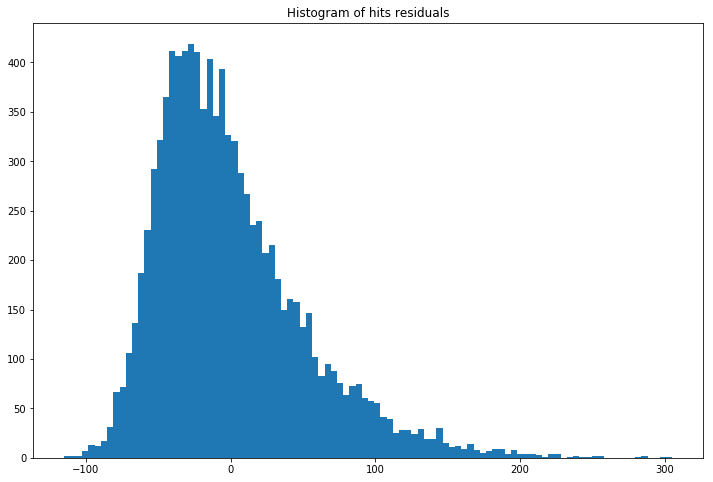

In [61]:
# Hm, this shows the best R^2 score, but even that is pretty poor.  Also, the negative intercept makes no sense, so once
# again, this looks like a bust.  But, just for completeness, the residuals.

plt.hist(hit_results.resid, bins=int(np.sqrt(len(df))))
plt.title('Histogram of hits residuals')
plt.show()

In [38]:
# So, once again, I'll try a random forest for comparison.

for feature in features:
    for estimator in estimators:
        hit_rf = RandomForestRegressor(n_estimators=estimator, max_features=feature, oob_score=True)
        hit_rf.fit(X_train_hit, y_train_hit)
        
        print('OOB score for {} max features tree with {} estimators is: {}'.format(feature, estimator, hit_rf.oob_score_))
    print('\n')

C:\Users\Hill HP 2015\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


OOB score for sqrt max features tree with 10 estimators is: -0.04892024680956286
OOB score for sqrt max features tree with 25 estimators is: 0.08912226407236501
OOB score for sqrt max features tree with 50 estimators is: 0.09328609159744472
OOB score for sqrt max features tree with 75 estimators is: 0.1020700232982733
OOB score for sqrt max features tree with 100 estimators is: 0.1063360412457347
OOB score for sqrt max features tree with 250 estimators is: 0.11871463810668115
OOB score for sqrt max features tree with 500 estimators is: 0.12083620918346938
OOB score for sqrt max features tree with 750 estimators is: 0.11959102636648944
OOB score for sqrt max features tree with 1000 estimators is: 0.11959032985128237


OOB score for log2 max features tree with 10 estimators is: -0.05354366443318104


C:\Users\Hill HP 2015\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


OOB score for log2 max features tree with 25 estimators is: 0.08540232041821194
OOB score for log2 max features tree with 50 estimators is: 0.09711389529591641
OOB score for log2 max features tree with 75 estimators is: 0.09982276992167238
OOB score for log2 max features tree with 100 estimators is: 0.1141113170644853
OOB score for log2 max features tree with 250 estimators is: 0.11834474520742722
OOB score for log2 max features tree with 500 estimators is: 0.12382180295125
OOB score for log2 max features tree with 750 estimators is: 0.12416664776929243
OOB score for log2 max features tree with 1000 estimators is: 0.12237566739744066


OOB score for None max features tree with 10 estimators is: -0.04782095422692634


C:\Users\Hill HP 2015\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


OOB score for None max features tree with 25 estimators is: 0.06737177043855225
OOB score for None max features tree with 50 estimators is: 0.11346696707973458
OOB score for None max features tree with 75 estimators is: 0.1200547920403463
OOB score for None max features tree with 100 estimators is: 0.131816894414576
OOB score for None max features tree with 250 estimators is: 0.13492168546607086
OOB score for None max features tree with 500 estimators is: 0.1388049681262422
OOB score for None max features tree with 750 estimators is: 0.13954913359714116
OOB score for None max features tree with 1000 estimators is: 0.14020081234563841




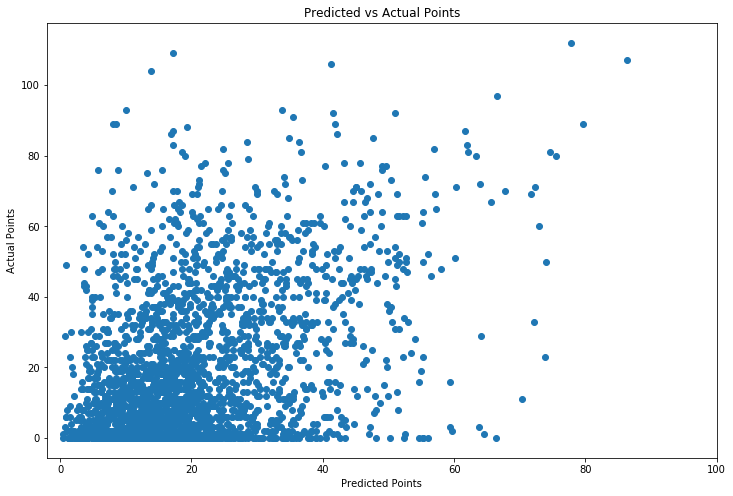

In [62]:
# Again, still not very good numbers, but the best so far.  So, clearly, random forest regressors beat out linear regression
# for all the predictors.  So, I'll just keep working with them. So now, I'll plot some predicted vs actual graphs using 
# just the random forest regressors.

plt.scatter(pts_rf.predict(X_test_pts),y_test_pts)
plt.title('Predicted vs Actual Points')
plt.ylabel('Actual Points')
plt.xlabel('Predicted Points')
plt.xlim((-2,100))
plt.show()

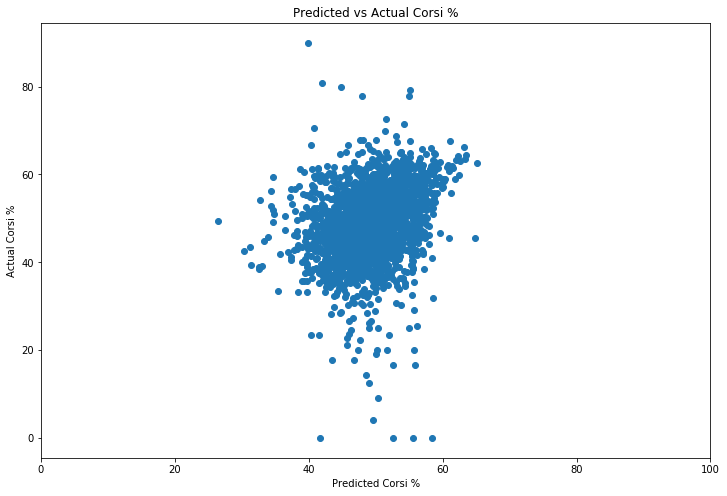

In [63]:
plt.scatter(cf_rf.predict(X_test_cf),y_test_cf)
plt.title('Predicted vs Actual Corsi %')
plt.ylabel('Actual Corsi %')
plt.xlabel('Predicted Corsi %')
plt.xlim((0,100))
plt.show()

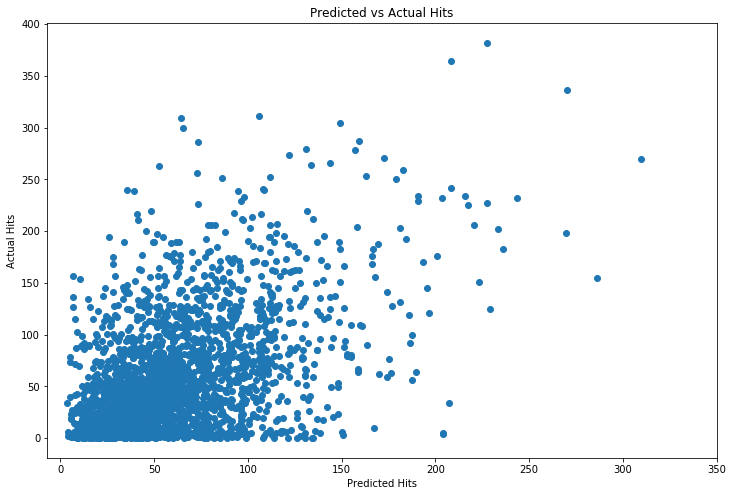

In [64]:
plt.scatter(hit_rf.predict(X_test_hit),y_test_hit)
plt.title('Predicted vs Actual Hits')
plt.ylabel('Actual Hits')
plt.xlabel('Predicted Hits')
plt.xlim((-7,350))
plt.show()

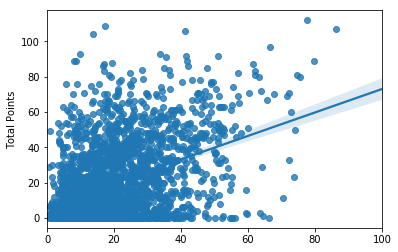

In [42]:
import seaborn as sns

plt.xlim((0,100))
sns.regplot(x=pts_rf.predict(X_test_pts),y=y_test_pts)
plt.show()

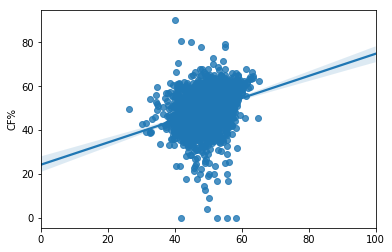

In [43]:
plt.xlim((0,100))
sns.regplot(x=cf_rf.predict(X_test_cf),y=y_test_cf)
plt.show()

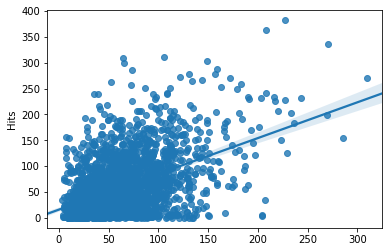

In [44]:
sns.regplot(x=hit_rf.predict(X_test_hit),y=y_test_hit)
plt.show()

In [45]:
# In all the Seaborn plots, the slope of the regression line is less than 45 degrees, so none of the models predict very well.
# But let me find the feature importances.  First, points.

pts_feat_imp = pd.DataFrame({'Features': df[['Height (in)','Weight (lbs)','Age','Nationality_CAN','Nationality_USA','Nationality_SWE','Nationality_CZE','Nationality_RUS','Nationality_FIN','Nationality_SVK','Nationality_OTH']].columns, 'Estimated Coefficients': np.reshape(pts_rf.feature_importances_,11)})
pts_feat_imp = pts_feat_imp.reindex(pts_feat_imp['Estimated Coefficients'].sort_values(ascending=False).index)
print('Feature Importance for points random forest')
print(pts_feat_imp)

Feature Importance for points random forest
    Estimated Coefficients         Features
1                 0.394952     Weight (lbs)
2                 0.268258              Age
0                 0.192539      Height (in)
3                 0.036450  Nationality_CAN
4                 0.029169  Nationality_USA
7                 0.020510  Nationality_RUS
5                 0.016967  Nationality_SWE
10                0.013098  Nationality_OTH
6                 0.012898  Nationality_CZE
8                 0.009993  Nationality_FIN
9                 0.005166  Nationality_SVK


In [46]:
# Next, corsi.

cf_feat_imp = pd.DataFrame({'Features': df[['Height (in)','Weight (lbs)','Age','Nationality_CAN','Nationality_USA','Nationality_SWE','Nationality_CZE','Nationality_RUS','Nationality_FIN','Nationality_SVK','Nationality_OTH']].columns, 'Estimated Coefficients': np.reshape(cf_rf.feature_importances_,11)})
cf_feat_imp = cf_feat_imp.reindex(cf_feat_imp['Estimated Coefficients'].sort_values(ascending=False).index)
print('Feature Importance for corsi % random forest')
print(cf_feat_imp)

Feature Importance for corsi % random forest
    Estimated Coefficients         Features
1                 0.386549     Weight (lbs)
2                 0.311600              Age
0                 0.202049      Height (in)
3                 0.023484  Nationality_CAN
4                 0.021175  Nationality_USA
10                0.011259  Nationality_OTH
8                 0.011197  Nationality_FIN
5                 0.010327  Nationality_SWE
6                 0.008438  Nationality_CZE
7                 0.008225  Nationality_RUS
9                 0.005697  Nationality_SVK


In [47]:
# Finally, hits.

hit_feat_imp = pd.DataFrame({'Features': df[['Height (in)','Weight (lbs)','Age','Nationality_CAN','Nationality_USA','Nationality_SWE','Nationality_CZE','Nationality_RUS','Nationality_FIN','Nationality_SVK','Nationality_OTH']].columns, 'Estimated Coefficients': np.reshape(hit_rf.feature_importances_,11)})
hit_feat_imp = hit_feat_imp.reindex(hit_feat_imp['Estimated Coefficients'].sort_values(ascending=False).index)
print('Feature Importance for hits random forest')
print(hit_feat_imp)

Feature Importance for hits random forest
    Estimated Coefficients         Features
1                 0.384346     Weight (lbs)
2                 0.284776              Age
0                 0.187960      Height (in)
3                 0.038321  Nationality_CAN
4                 0.032166  Nationality_USA
6                 0.014997  Nationality_CZE
5                 0.014692  Nationality_SWE
7                 0.014134  Nationality_RUS
10                0.012432  Nationality_OTH
8                 0.011954  Nationality_FIN
9                 0.004222  Nationality_SVK


In [48]:
# So, for all 3 random forest regressors, the most important features are weight, then age, then height.  But the overall
# conclusion must be that player performance cannot be predicted using only non-game metrics.  Finally, I'll show the table
# of R^2 and RMSE scores for reference.

r2_train_scores = [lr_score_train, ridge_score_train, lasso_score_train, rf_score_train]
r2_test_scores = [lr_score_test, ridge_score_test, lasso_score_test, rf_score_test]
rmse_train_scores = [lr_pts_rmse_train, ridge_pts_rmse_train, lasso_pts_rmse_train, rf_pts_rmse_train]
rmse_test_scores = [lr_pts_rmse_test, ridge_pts_rmse_test, lasso_pts_rmse_test, rf_pts_rmse_test]

score_table = pd.DataFrame({'R2 score train':r2_train_scores,'R2 score test':r2_test_scores,'RMSE score train':rmse_train_scores,'RMSE score test':rmse_test_scores})

score_table.rename(index={0:'base linear regression',1:'ridge regression',2:'lasso regression',3:'random forest'}, inplace=True)
score_table.head()

,R2 score test,R2 score train,RMSE score test,RMSE score train
base linear regression,0.047656,0.040776,414.148139,386.141300
ridge regression,0.047656,0.040776,414.148143,386.141300
lasso regression,0.047656,0.040776,414.148163,386.141300
random forest,0.124061,0.719230,380.921655,113.025847
